In [2]:
import pandas as pd
import numpy as np

In [3]:
df = pd.read_csv("annotator_labels.csv")
df

,bible,chunk,olivia,river,gerardo,nick,cameron
0,asv,2556,3,2,1,3,3
1,asv,10127,3,3,3,3,3
2,asv,9900,2,2,1,2,2
3,asv,3951,2,2,3,2,2
4,asv,3840,3,3,3,3,1
...,...,...,...,...,...,...,...
85,wmb,4236,3,3,1,3,3
86,wmb,5307,3,3,3,3,3
87,wmb,9942,3,2,2,1,1
88,wmb,4226,3,3,1,3,3


In [40]:
bibles = {
    "asv": "../model_annotation/asv_out.csv",
    "fbv": "../model_annotation/fbv_out.csv",
    "kjv": "../model_annotation/kjv_out.csv",
    "web": "../model_annotation/web_out.csv",
    "wmb": "../model_annotation/wmb_out.csv",
}

In [48]:
df_new = df.copy(deep=True)

In [63]:
for bible in bibles:
    df_bible = df[df["bible"] == bible]
    bible_asv = pd.read_csv(bibles[bible])
    for idx, row in df_bible.iterrows():
        chunk = row["chunk"]
        bible_sentiment = bible_asv[bible_asv["chunk"] == chunk]["sentiment"].values[0]
        bible_confidence = bible_asv[bible_asv["chunk"] == chunk]["confidence"].values[
            0
        ]
        bible_chunk = bible_asv[bible_asv["chunk"] == chunk]["chunk"].values[0]
        df_new.loc[
            (df["bible"] == bible) & (df["chunk"] == chunk),
            "bible_sentiment",
        ] = bible_sentiment

In [64]:
df_new["bible_sentiment"] = df_new["bible_sentiment"].astype("int64")

In [84]:
df_new.drop(columns=["annotator_sentiment_avg"], inplace=True)

In [85]:
df_new["annotator_sentiment_mode"] = df_new.iloc[:, 2:-1].apply(
    lambda x: x.mode()[0], axis=1
)

In [87]:
from sklearn.metrics import accuracy_score

print(accuracy_score(df_new["bible_sentiment"], df_new["annotator_sentiment_mode"]))

0.6666666666666666


In [88]:
for bible in bibles:
    print(
        accuracy_score(
            df_new[df_new["bible"] == bible]["bible_sentiment"],
            df_new[df_new["bible"] == bible]["annotator_sentiment_mode"],
        )
    )

0.5
0.8
0.72
0.5
0.6


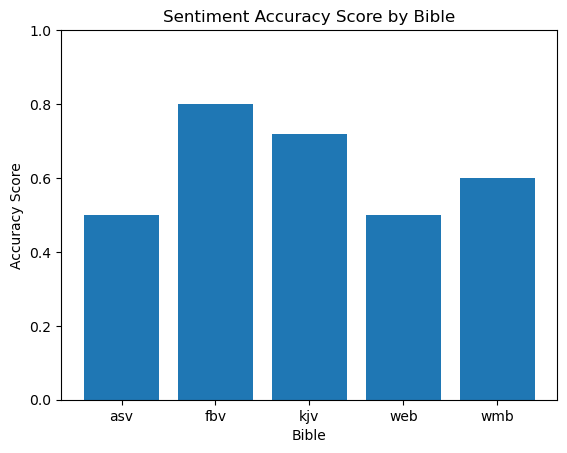

In [97]:
# Plot the accuracy score for each bible in a bar graph
import matplotlib.pyplot as plt

bible_accuracies = []
for bible in bibles:
    bible_accuracies.append(
        accuracy_score(
            df_new[df_new["bible"] == bible]["bible_sentiment"],
            df_new[df_new["bible"] == bible]["annotator_sentiment_mode"],
        )
    )

plt.bar(bibles.keys(), bible_accuracies)
plt.xlabel("Bible")
plt.ylabel("Accuracy Score")
plt.title("Sentiment Accuracy Score by Bible")
plt.ylim(0, 1)
plt.show()

In [105]:
df_new["annotator_sentiment_avg"] = (
    df_new.iloc[:, 2:-2].mean(axis=1).round().astype("int64")
)
df_new

,bible,chunk,olivia,river,gerardo,nick,cameron,bible_sentiment,annotator_sentiment_mode,annotator_sentiment_avg
0,asv,2556,3,2,1,3,3,1,3,2
1,asv,10127,3,3,3,3,3,1,3,3
2,asv,9900,2,2,1,2,2,2,2,2
3,asv,3951,2,2,3,2,2,2,2,2
4,asv,3840,3,3,3,3,1,1,3,2
...,...,...,...,...,...,...,...,...,...,...
85,wmb,4236,3,3,1,3,3,1,3,2
86,wmb,5307,3,3,3,3,3,3,3,3
87,wmb,9942,3,2,2,1,1,1,1,2
88,wmb,4226,3,3,1,3,3,1,3,2


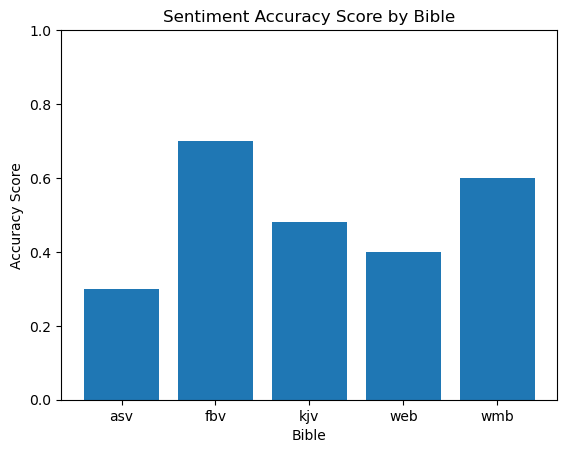

In [106]:
bible_accuracies = []
for bible in bibles:
    bible_accuracies.append(
        accuracy_score(
            df_new[df_new["bible"] == bible]["bible_sentiment"],
            df_new[df_new["bible"] == bible]["annotator_sentiment_avg"],
        )
    )

plt.bar(bibles.keys(), bible_accuracies)
plt.xlabel("Bible")
plt.ylabel("Accuracy Score")
plt.title("Sentiment Accuracy Score by Bible")
plt.ylim(0, 1)
plt.show()

In [107]:
for bible in bibles:
    print(
        accuracy_score(
            df_new[df_new["bible"] == bible]["bible_sentiment"],
            df_new[df_new["bible"] == bible]["annotator_sentiment_avg"],
        )
    )

0.3
0.7
0.48
0.4
0.6


(0.0, 1.0)

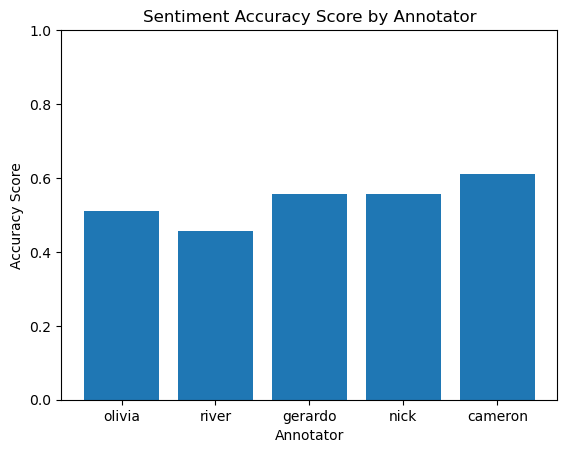

In [110]:
# Compare bible sentiment to each annotator's sentiment
annotator_accuracies = []
for annotator in df_new.columns[2:-3]:
    annotator_accuracies.append(
        accuracy_score(df_new["bible_sentiment"], df_new[annotator])
    )

plt.bar(df_new.columns[2:-3], annotator_accuracies)
plt.xlabel("Annotator")
plt.ylabel("Accuracy Score")
plt.title("Sentiment Accuracy Score by Annotator")
plt.ylim(0, 1)

In [135]:
bible_sentiments = {
    "asv": {"positive": 0, "negative": 0, "neutral": 0},
    "fbv": {"positive": 0, "negative": 0, "neutral": 0},
    "kjv": {"positive": 0, "negative": 0, "neutral": 0},
    "web": {"positive": 0, "negative": 0, "neutral": 0},
    "wmb": {"positive": 0, "negative": 0, "neutral": 0},
}

total_sentiment = {
    "asv": 0,
    "fbv": 0,
    "kjv": 0,
    "web": 0,
    "wmb": 0,
}

for bible in bibles:
    bible_df = pd.read_csv(bibles[bible])
    # Get the total count of each sentiment
    sentiment_counts = bible_df["sentiment"].value_counts()
    print(sentiment_counts)
    # bible_sentiments[bible].append(sentiment_counts[1] / sentiment_counts.sum())
    bible_sentiments[bible]["positive"] = sentiment_counts[2] / sentiment_counts.sum()
    bible_sentiments[bible]["negative"] = sentiment_counts[3] / sentiment_counts.sum()
    bible_sentiments[bible]["neutral"] = sentiment_counts[1] / sentiment_counts.sum()

    total_sentiment[bible] = (sentiment_counts[2]) / (
        sentiment_counts[2] + sentiment_counts[3]
    )

1    7400
2    1745
3    1257
Name: sentiment, dtype: int64
1    5297
3    2843
2    2223
Name: sentiment, dtype: int64
1    7057
2    1903
3    1408
Name: sentiment, dtype: int64
1    7711
3    2415
2    2371
0       3
Name: sentiment, dtype: int64
1    6570
2    1960
3    1836
Name: sentiment, dtype: int64


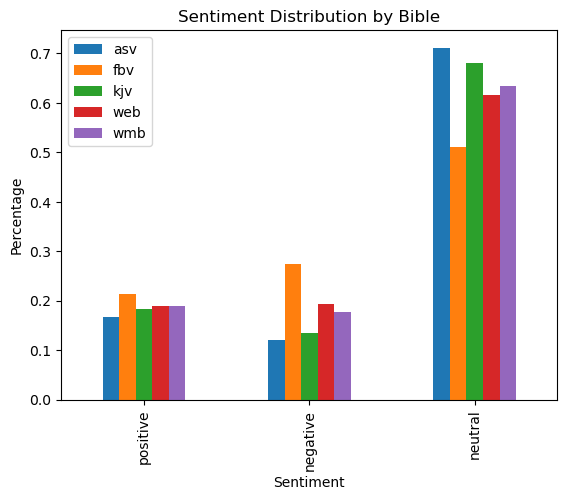

In [136]:
# Graph the sentiment distribution for each bible
bible_sentiments_df = pd.DataFrame(bible_sentiments)
bible_sentiments_df.plot(kind="bar")
plt.xlabel("Sentiment")
plt.ylabel("Percentage")
plt.title("Sentiment Distribution by Bible")
plt.show()

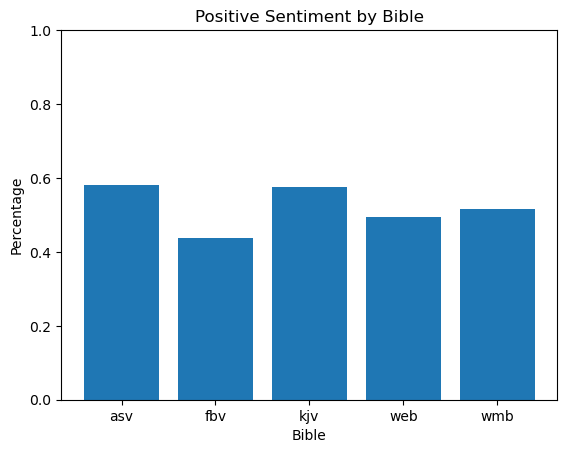

In [140]:
# Graph the total sentiment for each bible
plt.bar(bibles.keys(), total_sentiment.values())
plt.xlabel("Bible")
plt.ylabel("Percentage")
plt.title("Positive Sentiment by Bible")
plt.ylim(0, 1)
plt.show()